In [ ]:
from google.colab import files
uploaded=files.upload()
    

Saving hmeq (1).csv to hmeq (1).csv


Importing modules 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Importing the data frame 

In [ ]:
df = pd.read_csv("/content/hmeq (1).csv")

Displaying the data set which needs to get tested


[BAD= prediction, Loan= Amount of loan requested, Mortdue= Amount due on existing mortgage, Value= Value of current property, Reason= DebtCon: debt consolidation HomeImp: home improvement, Job: Six occupational categories, YOJ= Years at present job, DEROG= Number of major derogatory reports, DELINQ= Number of delinquent credit lines, CLAGE= Age of oldest trade line in months, NINQ= Number of recent credit lines, CLNO= Number of credit lines, DEBTINC= Debt-to-income ratio]

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


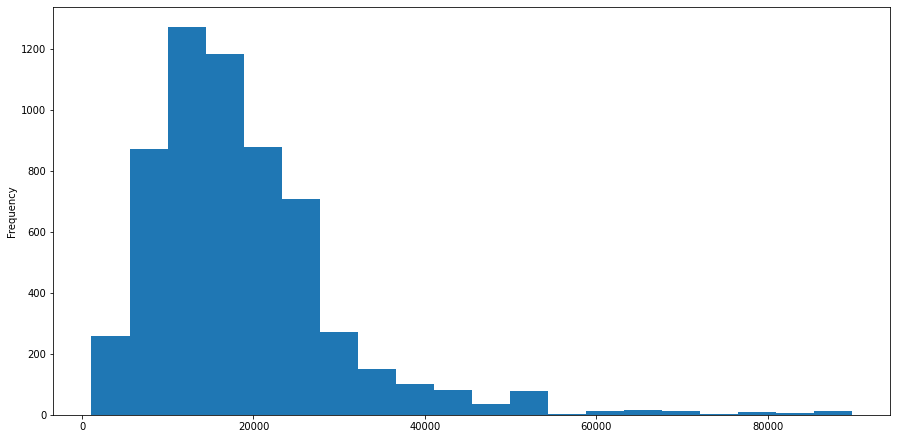

In [ ]:
df["LOAN"].plot.hist(bins = 20,figsize=(15,7.5))

Displaying the unique values from the attributes using unique( ) function

In [ ]:
df['REASON'].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [ ]:
df['JOB'].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

Replacing the null values in the data frame using fillna( ) function

In [ ]:
df['REASON'].replace(['HomeImp', 'DebtCon'], [0, 1], inplace=True)
df['JOB'].replace(['Other', 'Office', 'Sales','Mgr','ProfExe','Self'], [0,1,2,3,4,5], inplace=True)
df=df.fillna(df.mean())

In [ ]:
df.head()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


Storing the BAD values as a NumPy array

In [ ]:
df_labels = df['BAD']
df.drop(df.columns[[0]], axis=1, inplace=True)
df_labels.unique()

array([1, 0])

In [ ]:
y = np.array(df_labels)
x = np.array(df)

Training, testing and splitting the dataset using the following module by sending the required parameters

In [ ]:
x_train, x_test, y_train, y_text = train_test_split(x,y, random_state = 44)

Returns the dimensions of the trained dataset

In [ ]:
x_train.shape

(4470, 12)

In [ ]:
class Node:
    def __init__(self):
        
        #left and right child nodes
        self.right = None
        self.left = None
        
        # derived from splitting criteria
        self.column = None
        self.threshold = None
        
        # probability for object inside the Node to belong for each of the given classes
        self.probas = None
        # depth of the given node
        self.depth = None
        
        # checking if it is the root Node or not
        self.is_terminal = False

In [40]:
class DecisionTreeClassifier:
    def __init__(self, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2):
        
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        
        # Decision tree itself
        self.Tree = None
    
    def nodeProbas(self, y):

        #Calculates probability of class in a given node
        probas = []
        
        # for each unique label calculate the probability for it
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):

        #Calculates gini criterion,ie, probability of specific feature classified incorrectly when selected randomly
        
        return 1 - np.sum(probas**2)
    
    def calcImpurity(self, y):
  
        #Wrapper for the impurity calculation. Calculates probas first and then passses them to the Gini criterion
        
        return self.gini(self.nodeProbas(y))
    
    def calcBestSplit(self, X, y):

        #Calculates the best possible split for the concrete node of the tree
        
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        
        impurityBefore = self.calcImpurity(y)
        
        # for each column in X
        for col in range(X.shape[1]):
            x_col = X[:, col]
            
            # for each value in the column
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
                    
                # calculate impurity for the right and left nodes
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)
                
                # calculate information gain
                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
                    
        
        # if we still didn't find the split
        if bestInfoGain == -999:
            return None, None, None, None, None, None
        
        # making the best split
        
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]
        
        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right
    
    def buildDT(self, X, y, node):
  
        #Recursively builds decision tree from the top to bottom
  
        
        # checking for the terminal conditions
        
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        
        # calculating current split
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        
        if splitCol is None:
            node.is_terminal = True
            
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        
        node.column = splitCol
        node.threshold = thresh
        
        # creating left and right child nodes
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        
        # splitting recursevely
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)
    
    def fit(self, X, y):
        
        #Standard fit function to run all the model training
    
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
        
        self.classes = np.unique(y)
        # root node creation
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        
        self.buildDT(X, y, self.Tree)
    
    def predictSample(self, x, node):
      
        #Passes one object through decision tree and return the probability of it to belong to each class
    
        # if we have reached the terminal node of the tree
        if node.is_terminal:
            return node.probas
        
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)
            
        return probas
    
    def predict(self, X):
      
        #Returns the labels for each X
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)
        
        return np.asarray(predictions)

In [ ]:
dt_hmeq = DecisionTreeClassifier(100)

In [ ]:
dt_hmeq.fit(x_train, y_train)


Using predict function we predict the labels of the data model with the trained data set

In [ ]:
pred_y = dt_hmeq.predict(x_test)

Accuracy of the model is calculated by dividing the number of correct predictions by total number of predictions.

In [ ]:
acurracy = list(pred_y - y_text).count(0)/len(y_text)

In [ ]:
print(acurracy)

0.8503355704697987


In [ ]:
inp = []
ls = df.columns 
for header in ls:
  data = float(input("Enter the value for "+header+" :  ").strip())
  inp.append(data)

inp_x = np.array(inp)
inp_x = np.reshape(inp_x,(1,12))
prediction = dt_hmeq.predict(inp_x)
if(prediction == 0):
  print("The person will be able to pay back the loan.")
else:
  print("The person will not be able to pay back the loan.")

Enter the value for LOAN :  5000
Enter the value for MORTDUE :  1200
Enter the value for VALUE :  40000
Enter the value for REASON :  0
Enter the value for JOB :  2
Enter the value for YOJ :  20
Enter the value for DEROG :  20
Enter the value for DELINQ :  30
Enter the value for CLAGE :  20
Enter the value for NINQ :  2
Enter the value for CLNO :  9
Enter the value for DEBTINC :  33.77
The person will not be able to pay back the loan.
